In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import data
import models
import os
import sys
import time
import numpy as np
import collections



In [2]:
argmap = { 'model':'A' ,
          'train_path':'os.path.join(data_dir, \'1-Large-Scale\', \'train\')' ,
          'valid_path':'os.path.join(data_dir,\'test\')' ,
          'trainlim':10000000 ,
          'validlim':10000000 ,
          'batch_size':1 ,
          'lr':0.001 ,
          'epochs':1 , 
          'who':'Simply_test' , 
          'rounds_per_train':1 }

In [3]:
data_dir = "../hw2_dataset/" ## You need to specify the data_dir first
inupt_size = 224
batch_size = argmap['batch_size']
train_loader, valid_loader = data.load_data(data_dir=data_dir,input_size=inupt_size, batch_size=batch_size, argmap=argmap)

In [5]:
import torchvision

In [6]:
model = torchvision.models.resnet50(pretrained=True)

In [5]:
# model.load_state_dict(torch.load("Task1_modelResnet_best_model.pkl"))

<All keys matched successfully>

In [6]:
# model.eval()

In [7]:
class IntermediateLayerGetter(nn.ModuleDict):
    """ get the output of certain layers """
    def __init__(self, model, return_layers):
        # 判断传入的return_layers是否存在于model中
        if not set(return_layers).issubset([name for name, _ in model.named_children()]):
            raise ValueError("return_layers are not present in model")

        orig_return_layers = return_layers
        return_layers = {k: v for k, v in return_layers.items()}	# 构造dict
        layers = collections.OrderedDict()
        # 将要从model中获取信息的最后一层之前的模块全部复制下来
        for name, module in model.named_children():
            layers[name] = module
            if name in return_layers:
                del return_layers[name]
            if not return_layers:
                break

        super(IntermediateLayerGetter, self).__init__(layers) # 将所需的网络层通过继承的方式保存下来
        self.return_layers = orig_return_layers

    def forward(self, x):
        out = collections.OrderedDict()
        # 将所需的值以k,v的形式保存到out中
        for name, module in self.named_children():
            x = module(x)
            if name in self.return_layers:
                out_name = self.return_layers[name]
                out[out_name] = x
        return out


In [8]:
for name, module in model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [9]:
return_layers = {'avgpool':'feature_1'}
backbone = IntermediateLayerGetter(model, return_layers)
backbone.eval()
x = torch.randn(1,3,224,224)
out = backbone(x)
print(out['feature_1'].shape)

torch.Size([1, 2048, 1, 1])


In [318]:
ddl = 10 
for inputs, labels in train_loader:
    outputs = model(inputs)
    print(outputs,labels)
    ddl -= 1
    if ddl<=0: break

tensor([[ 1.4467, -5.3580, -5.3231,  1.6598, -3.2578,  2.4042, -1.9577, -3.3861,
          9.6190,  5.2910]], grad_fn=<AddmmBackward>) tensor([8])
tensor([[-0.7488,  9.8259, -4.0999,  3.7920, -1.0758,  0.2114, -3.0780, -3.6437,
          3.5086, -3.8207]], grad_fn=<AddmmBackward>) tensor([1])
tensor([[-0.7634,  3.0017,  4.9596,  2.6144, -7.9361, -9.3815, -7.7911, -8.5638,
          9.0429, 16.5948]], grad_fn=<AddmmBackward>) tensor([9])
tensor([[ -6.5366, -12.3772,  -1.4838,   3.5059,   4.3051,  -1.4667,  -0.4409,
          12.9965,   4.7987,  -2.3435]], grad_fn=<AddmmBackward>) tensor([7])
tensor([[  1.8912,  12.1901,   5.9510,   0.9340,  -8.5862,   7.3933,  -0.8661,
         -10.4064,  -1.2891,  -6.4747]], grad_fn=<AddmmBackward>) tensor([1])
tensor([[-6.9291, 16.5779,  3.1856,  4.5405, -5.2528,  1.3623, -5.4696, -5.8020,
          2.6647, -4.2072]], grad_fn=<AddmmBackward>) tensor([1])
tensor([[ 1.5260, -1.7554, -6.2079,  5.9052, -0.1729, -1.6264, -3.6530, -2.8228,
          6.7983,

In [10]:
if 1:
    x = torch.randn(1,3,224,224)
    out = backbone(x)
    print(out['feature_1'].detach().view(-1).numpy())

[0.11787172 0.04969409 0.         ... 0.22110477 0.         0.58396477]


In [11]:
import time
tongX = []
tongY = []
cnt = 0
import numpy as np
for inputs, labels in train_loader:
#     outputs = backbone(inputs)
    outputs = backbone(torch.randn(1,3,224,224))
    tmp = outputs['feature_1'].clone().detach().view(-1).numpy()
    fuck = tmp.tolist().copy()
#     print(fuck[:3])
    tongX.append(fuck)
    tongY.append(int(labels))
    if (cnt%1000<argmap['batch_size']):
        print(cnt,time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    cnt += int(argmap['batch_size'])
#     if (cnt>10): break

0 2021-04-04 16:09:39
1000 2021-04-04 16:11:43
2000 2021-04-04 16:13:46
3000 2021-04-04 16:15:50
4000 2021-04-04 16:17:51
5000 2021-04-04 16:19:56
6000 2021-04-04 16:22:00
7000 2021-04-04 16:24:04
8000 2021-04-04 16:26:08
9000 2021-04-04 16:28:12
10000 2021-04-04 16:30:13
11000 2021-04-04 16:32:10
12000 2021-04-04 16:34:06
13000 2021-04-04 16:36:05
14000 2021-04-04 16:38:05
15000 2021-04-04 16:40:04
16000 2021-04-04 16:42:04
17000 2021-04-04 16:44:02
18000 2021-04-04 16:46:02
19000 2021-04-04 16:48:02
20000 2021-04-04 16:50:01
21000 2021-04-04 16:52:01


In [12]:
len(tongX),len(tongX[0]), len(tongY)

(21600, 2048, 21600)

In [13]:
for i in range(10):
    print(tongX[i][:5])

[0.10674464702606201, 0.11495482921600342, 0.0, 0.016226230189204216, 0.1841917783021927]
[0.14353175461292267, 0.12400756776332855, 0.0, 0.024785302579402924, 0.17135684192180634]
[0.16827113926410675, 0.08933058381080627, 0.0, 0.05322844162583351, 0.0670585110783577]
[0.11665311455726624, 0.0500570647418499, 0.0, 0.05239703133702278, 0.12073805183172226]
[0.1372455209493637, 0.09793474525213242, 0.0, 0.036086130887269974, 0.13087673485279083]
[0.07323544472455978, 0.06804461032152176, 0.0, 0.013122832402586937, 0.046878863126039505]
[0.10171658545732498, 0.08115492016077042, 0.0, 0.00980434287339449, 0.1401710957288742]
[0.14695191383361816, 0.22004757821559906, 0.0, 0.06169797107577324, 0.10901298373937607]
[0.14439335465431213, 0.11725059151649475, 0.0, 0.03500303253531456, 0.15233035385608673]
[0.11181610822677612, 0.10346971452236176, 0.0, 0.01715722680091858, 0.20010358095169067]


In [14]:
import random
for i in range(20):
    for j in range(i+1,20):
        d=0.
        for k in range(10):
            d+=(tongX[i][k]-tongX[j][k])**2
        if tongY[i]!=tongY[j]:
            if random.random()<0.8:
                continue
        print(tongY[i]-tongY[j],d)

-1 0.009070610669916577
0 0.01424594030224222
0 0.03163244542610778
0 0.021182040012325758
4 0.023068822690270375
-2 0.012181370644365398
-3 0.00816121563503544
-2 0.015701246879834742
-1 0.01071084518622023
-1 0.021007694490502084
0 0.00928439255128495
0 0.01050106431876051
0 0.03310703313831636
0 0.02563360762911922
0 0.016664683520584152
0 0.016065365925442714
0 0.022389998590838057
0 0.018831739093652673
5 0.006798474006559267
0 0.009705808881173329
0 0.038989733062764445
0 0.04145130794387347
8 0.014908688471087868
3 0.014474622364829994
0 0.03061880367843187
0 0.016060629817677315
6 0.003603965458175128
9 0.010724307220260245
6 0.014823431529201197
-1 0.01880014231232327
0 0.04670124355197123
5 0.0337281655059581
5 0.012830520298818399
0 0.041551585488288995
7 0.014486408723580022
6 0.013095148031933554
5 0.020608758962501108
8 0.029395290787154298
0 0.004861420306691559
2 0.008989780991699406
-3 0.010628015299281104
-1 0.023239855067982554
-6 0.01879030614970094
-2 0.03174503470

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200,perplexity=50)

In [18]:
tongXemb = tsne.fit_transform(tongX.copy())

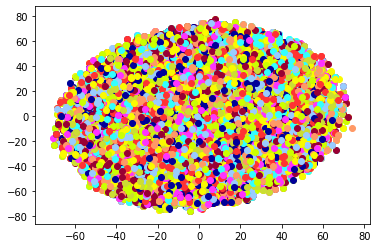

In [19]:
# colors = ['#00CED1','#DC143C']
# import matplotlib.pyplot as plt
# plt.scatter(2, 4, c=colors[0])
# plt.scatter(4, 8, c=colors[1])
# plt.show()
colors = ['#FAFA00','#CCFF00','#99CCFF','#CCDD33','#FF9966',
          '#FF33FF','#000099','#FF3333','#33FFFF','#990033']
import matplotlib.pyplot as plt
for i in range(len(tongXemb)):
    plt.scatter(tongXemb[i,0],tongXemb[i,1],c=colors[tongY[i]])
plt.show()

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=20,perplexity=5)

In [39]:
tongXpar = []
for i in range(len(tongX)):
    tongXpar.append(tongX[i][:2].copy())
# tongXparemb = tsne.fit_transform(tongXpar[:100].copy())
tongXparemb = np.array(tongXpar[:1000].copy())

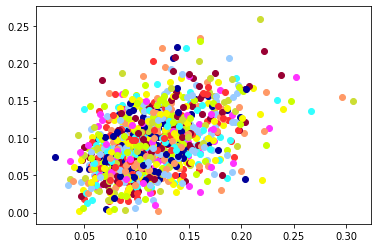

In [40]:
# colors = ['#00CED1','#DC143C']
# import matplotlib.pyplot as plt
# plt.scatter(2, 4, c=colors[0])
# plt.scatter(4, 8, c=colors[1])
# plt.show()
colors = ['#FAFA00','#CCFF00','#99CCFF','#CCDD33','#FF9966',
          '#FF33FF','#000099','#FF3333','#33FFFF','#990033']
import matplotlib.pyplot as plt
for i in range(len(tongXparemb)):
    plt.scatter(tongXparemb[i,0],tongXparemb[i,1],c=colors[tongY[i]])
plt.show()

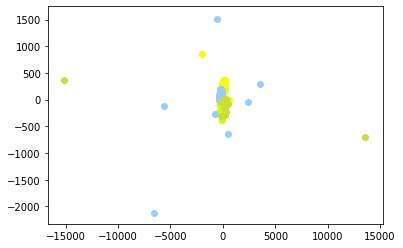

In [139]:
import random
testX = []
testY = []
for c in range(4):
    xx = random.random()*100
    yy = random.random()*100
    for i in range(50):
        testX.append([xx+random.random()*5,yy+random.random()*5])
        testY.append(c)
tsne = TSNE(learning_rate=1000,perplexity=10)
testXemb = tsne.fit_transform(testX)
# print(testXemb)
colors = ['#FAFA00','#CCFF00','#99CCFF','#CCDD33','#FF9966',
          '#FF33FF','#000099','#FF3333','#33FFFF','#990033']
import matplotlib.pyplot as plt
for i in range(len(testXemb)):
    plt.scatter(testXemb[i,0],testXemb[i,1],c=colors[testY[i]])
plt.show()